# ***Creation of table and displaying graphs***

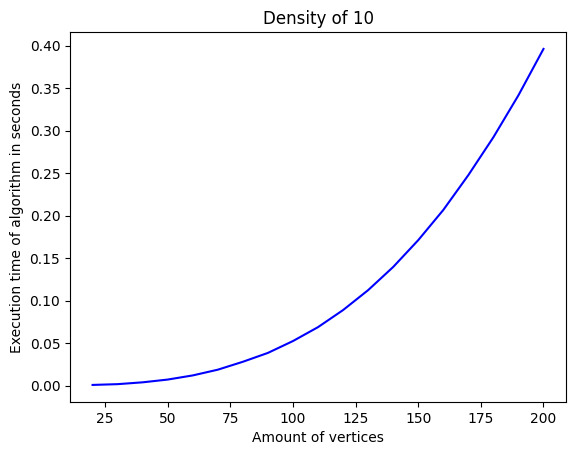

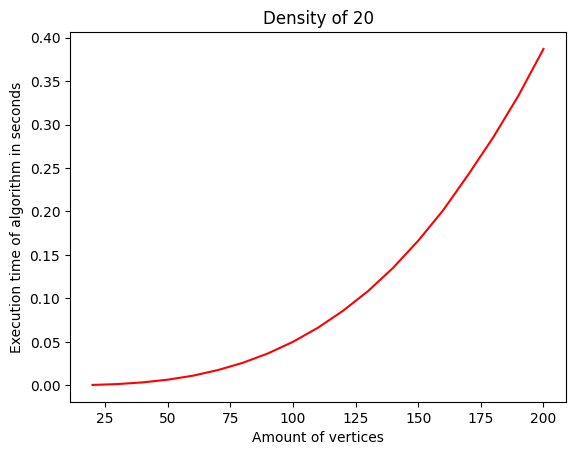

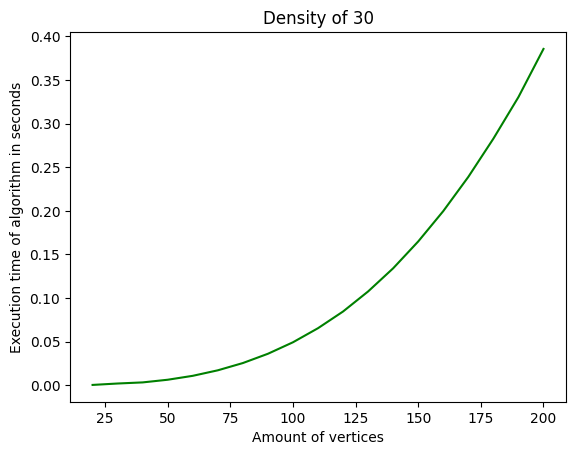

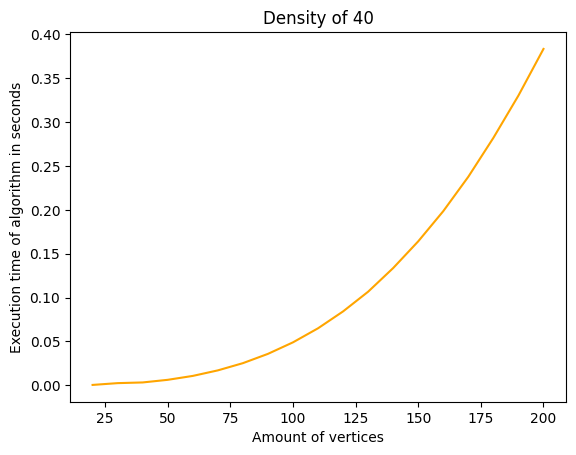

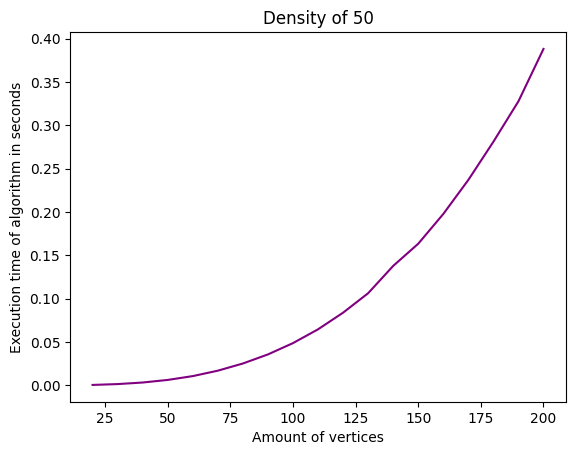

In [7]:
import pandas as pd
from Conversions import *
from GraphGenerator import *
from WarshallAlgorithm import *
import matplotlib.pyplot as plt
import numpy as np




list_of_n_vertices = [20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
list_of_density= [10,20,30,40,50]
AMOUNT_OF_EXPERIMENT = 40
dict_n_verticle = {}
for n_vertices in list_of_n_vertices:
    dict_n_verticle[n_vertices] = []
    for density in list_of_density:
        n = 0
        list_conduction_time = []
        while n < AMOUNT_OF_EXPERIMENT:
            graph = GraphGenerator.generate(n_vertices, density)
            reachability_matrix, conduction_time = WarshallAlgorithm.get_reachability_matrix(graph)
            list_conduction_time.append(Conversions.convert_microseconds_to_seconds(conduction_time))
            n += 1
        dict_n_verticle[n_vertices].append((density, np.mean(list_conduction_time)))


list_for_table = []
for n_vertices in dict_n_verticle.keys():
    list_value_given_amount_of_vericle = dict_n_verticle[n_vertices]
    for value in list_value_given_amount_of_vericle:
        density,time = value
        list_for_table.append([n_vertices, density, time])
df = pd.DataFrame(data=list_for_table, columns=['Amount of verticles', 'Density', 'Average execution of algorithm in seconds'])

df.to_csv('table.csv', index = False, mode = 'w')



list_for_graphs = []
colors = ['blue', 'red', 'green', 'orange', 'purple']

for n_vertices in dict_n_verticle.keys():
    list_value_given_amount_of_vericle = dict_n_verticle[n_vertices]
    for value in list_value_given_amount_of_vericle:
        density,time = value
        list_for_graphs.append([n_vertices, density, time])

dict_density = {}
for index, density in enumerate(list_of_density):
    x_list = []
    y_list = []
    for experiment in list_for_graphs:
        if experiment[1] == density:
            x_list.append(experiment[0])
            y_list.append(experiment[2])
    fig, ax = plt.subplots()
    ax.plot(x_list, y_list, color = colors[index])
    ax.set_title(f'Density of {density}')
    ax.set_xlabel('Amount of vertices')
    ax.set_ylabel('Execution time of algorithm in seconds')